# Setup
## Imports

In [ ]:
# If colab then setup else pass to rest of the code
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=False)
    %cd /content/drive/MyDrive/Coding/spread-res/runscr/
except ImportError: pass

# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGrid

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGrid)

# Import the model and funcs required from utils
from classes.models.BertGrid import BertGrid
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [ ]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGrid",
    "model_base": "bert-base-cased",
    "data_ds": "50",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 128,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 512,
    # Training Parameters
    "batch_size": 6,
    "lr": 1e-4,
    "mu": 0.25,
    "epochs": 200,
    "patience": 2,
    "save_int": 0,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

# Define the model
untrained_model = BertGrid(config).to(DEVICE)

Processing files: 100%|██████████| 40/40 [00:08<00:00,  4.45it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5812.51it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5451.40it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGridNew",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "50",
  "data_dir": "../data",
  "train_dir": "../data/50_train",
  "val_dir": "../data/50_val",
  "test_dir": "../data/50_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 128,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 512,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 6,
  "lr": 0.0001,
  "mu": 0.25,
  "epochs": 200,
  "patience": 2,
  "sa

# Model Training

1. GPU Model: 521 mb
2. GPU Training: 31.2 gb

3. Per Epoch Train Time: 2s
4. Per Epoch Val Time: \<1s


In [ ]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.4603e+00, Val Loss: 1.5847e+00


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


Train Loss: 1.2427e+00, Val Loss: 1.3146e+00


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.1787e+00, Val Loss: 1.1854e+00


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


Train Loss: 1.0401e+00, Val Loss: 1.0721e+00


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 9.7264e-01, Val Loss: 9.6182e-01


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


Train Loss: 8.8187e-01, Val Loss: 8.0172e-01


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


Train Loss: 7.6143e-01, Val Loss: 6.1055e-01


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 6.1725e-01, Val Loss: 4.3233e-01


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 4.4329e-01, Val Loss: 2.8252e-01


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 3.3549e-01, Val Loss: 2.1042e-01


Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 2.8123e-01, Val Loss: 1.7461e-01


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


Train Loss: 2.4914e-01, Val Loss: 1.5439e-01


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 2.2509e-01, Val Loss: 1.4075e-01


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 2.2292e-01, Val Loss: 1.3058e-01


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 2.0398e-01, Val Loss: 1.2720e-01


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.8829e-01, Val Loss: 1.2252e-01


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


Train Loss: 1.8087e-01, Val Loss: 1.1795e-01


Epoch 17


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.7809e-01, Val Loss: 1.1078e-01


Epoch 18


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.6620e-01, Val Loss: 1.0545e-01


Epoch 19


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.6099e-01, Val Loss: 1.0376e-01


Epoch 20


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.4839e-01, Val Loss: 9.9889e-02


Epoch 21


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.3912e-01, Val Loss: 9.4291e-02


Epoch 22


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.2901e-01, Val Loss: 9.1003e-02


Epoch 23


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.2533e-01, Val Loss: 8.5090e-02


Epoch 24


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.1501e-01, Val Loss: 8.2482e-02


Epoch 25


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.0691e-01, Val Loss: 8.2972e-02


Epoch 26


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.0112e-01, Val Loss: 7.6668e-02


Epoch 27


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 1.0594e-01, Val Loss: 8.4504e-02


Epoch 28


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 9.7526e-02, Val Loss: 7.3723e-02


Epoch 29


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 8.8904e-02, Val Loss: 7.2197e-02


Epoch 30


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


Train Loss: 9.0603e-02, Val Loss: 7.3526e-02


Epoch 31


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


Train Loss: 8.2136e-02, Val Loss: 7.1741e-02


Epoch 32


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


Train Loss: 8.0353e-02, Val Loss: 7.2819e-02


Epoch 33


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

Train Loss: 7.9303e-02, Val Loss: 7.7407e-02


EARLY STOPPING at epoch 33, best epoch 31
Train Loss = 8.2136e-02, Val Loss = 7.1741e-02


TRAINING DONE at epoch 33, best epoch 31
Train Loss = 0.08213588808264051, Perplexity = 1.000001368932405
Val Loss = 0.07174096256494522, Perplexity = 1.0000011956834243


# Evaluation

In [ ]:
# Params
loc = 0
thresh = 0.985

## Single Example


Filename: ../data/50_train/5%20ORD-013745%20CTD%20Chemical-gene%20interactions.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(2,2): 0.986494 | (2,4): 0.986584 | (2,6): 0.986874 | (0,0): 0.987353 | (2,0): 0.988073 | (2,5): 0.988417 | (2,3): 0.988457 | (2,1): 0.988509

NB to B ratio: Predicted = 9987:13 | Actual = 9992:8
Accuracy: 99.95% | Precision: 61.54% | Recall: 100.00% | F1-Score: 0.76



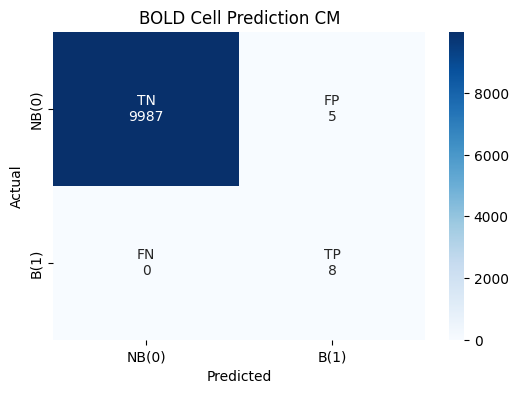


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0
13,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0
61,0,0,1,0,0,0,0
78,0,0,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1


In [ ]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_val/LMDI_Combined.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
No bold cells in the actual data.

NB to B ratio: Predicted = 9984:16 | Actual = 10000:0
Accuracy: 99.84% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



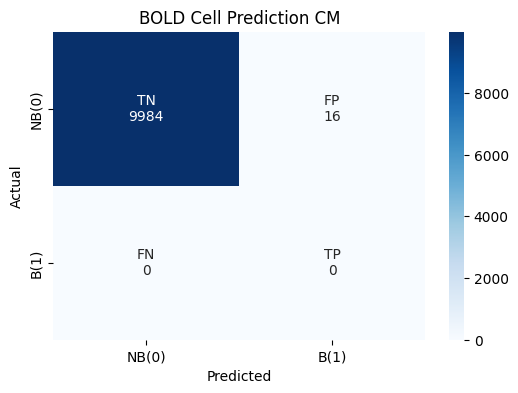


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,3
0,0,1,1
1,1,0,0
2,1,0,0
4,1,0,0
6,1,0,1
9,0,1,1
10,1,0,0
11,1,0,0
12,1,1,0
13,1,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---
No bold cells in actual data.


In [ ]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_test/retrospective-review-plan-report-20150317.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,9): 0.016680 | (0,11): 0.016794 | (0,7): 0.053321 | (0,10): 0.072092 | (0,6): 0.757879 | (0,8): 0.937554 | (0,0): 0.945762 | (0,5): 0.972962 | (0,2): 0.985979 | (0,3): 0.987371 | (0,4): 0.987570 | (0,1): 0.988142

NB to B ratio: Predicted = 9907:93 | Actual = 9988:12
Accuracy: 99.03% | Precision: 4.30% | Recall: 33.33% | F1-Score: 0.08



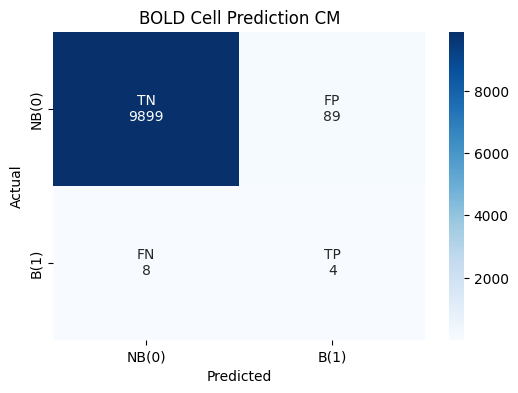


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,6,7
0,0,1,1,1,1,0,0
1,1,1,1,1,0,0,1
2,1,1,0,0,0,1,0
3,1,1,0,0,0,0,0
4,1,1,1,1,1,0,1
5,1,1,1,1,1,0,0
6,1,1,1,1,0,0,0
7,1,1,0,1,0,0,0
8,1,1,0,1,0,1,1
9,1,1,1,1,1,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 7/7 [00:01<00:00,  4.65it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 398468:1532 | Actual = 399199:801
Accuracy: 99.79% | Precision: 50.04% | Recall: 89.81% | F1-Score: 0.59



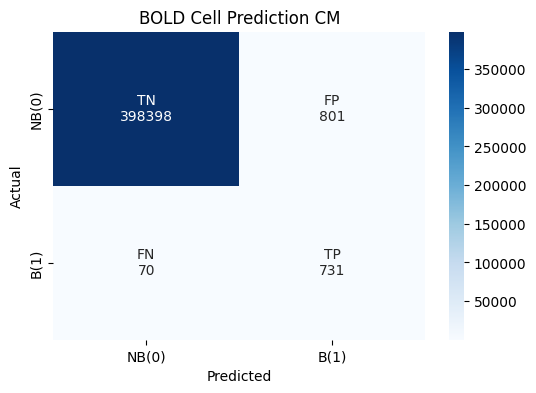

In [ ]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49748:252 | Actual = 49846:154
Accuracy: 99.71% | Precision: 51.59% | Recall: 84.42% | F1-Score: 0.64



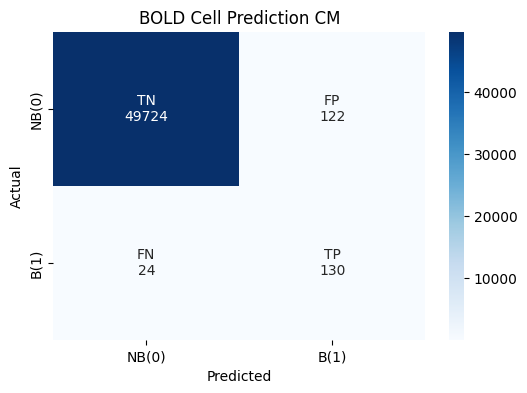

In [ ]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49522:478 | Actual = 49801:199
Accuracy: 99.22% | Precision: 29.92% | Recall: 71.86% | F1-Score: 0.42



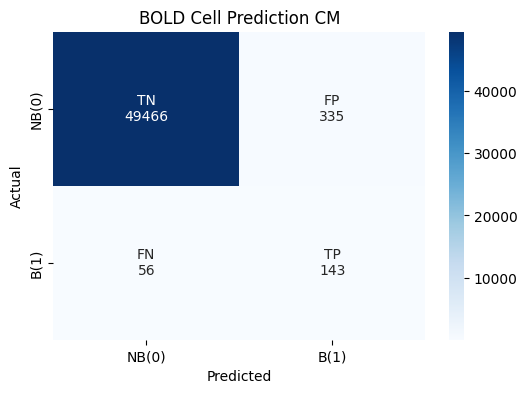

In [ ]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)